<html><font size=6><B>3η εργαστηριακή άσκηση</B><BR>
    <BR><B>Link prediction - Πρόβλεψη συνδέσμων</B></BR>
    </font></html>

## 1. Κατασκευή γράφου και προεργασία για την πρόβλεψη συνδέσμων

### 1(i)

* Χρησιμοποιήστε το dataset <a href="http://konect.cc/networks/dbpedia-similar/"> Similarities (DBpedia)</a>, για να κατασκευάσετε τον μη κατευθυνόμενο (undirected) γράφο $G$ <a href="https://dl.acm.org/doi/10.1145/2487788.2488173">[1]</a>,<a href="https://link.springer.com/chapter/10.1007/978-3-540-76298-0_52">[2]</a>.
* Οι κόμβοι του γράφου αναπαριστούν σελίδες της Wikipedia και οι ακμές σχέση ομοιότητας μεταξύ τους.
* Στην σελίδα <a href="http://konect.cc/networks/dbpedia-similar/"> KONECT (DBpedia)</a> μπορείτε να βρείτε πληροφορίες για τις ιδιότητες του γράφου.</a>
* <U>Υπόδειξη:</U>Μπορείτε να ελέγξετε προγραμματιστικά αν το dataset περιέχει διπλότυπα των ακμών με την ίδια ή αντίστροφη σειρά (π.χ. ακμές (a,b) και (b,a)), και να λάβετε υπ' όψιν σας αυτήν σας την παρατήρηση, όπου τυχόν χρειαστεί, στην ερώτηση 2.

#### Διαβάζω τις ακμές από το dataset:

In [1]:
def read_edges(filename):

  def valid(line):
    nums = line.split(' ')
    if len(nums)==2:
      try:
        nums[0]=int(nums[0])
        nums[1]=int(nums[1])
        return True
      except Exception as e:
        return False
    else:
      return False

  def transform(line):
    return list(map(lambda x: int(x)-1, line.replace("\n", "").split(' ')))

  edges = []
  with open(filename) as f:
    lines = f.readlines()
    for line in lines:
      if line.startswith("%"):
        continue
      edge = transform(line)
      edges.append(edge)
  return edges

In [2]:
txt_edges = read_edges("out.dbpedia-similar")
print(txt_edges)

[[0, 1], [0, 2], [0, 3], [0, 4], [1, 2], [2, 3], [2, 4], [2, 5], [3, 5], [4, 5], [4, 45], [4, 46], [4, 47], [5, 31], [5, 45], [5, 46], [5, 47], [5, 48], [6, 7], [7, 8], [7, 9], [8, 167], [8, 183], [9, 184], [10, 11], [10, 12], [10, 13], [11, 13], [11, 14], [13, 15], [14, 112], [14, 160], [14, 161], [14, 162], [16, 17], [16, 18], [18, 19], [18, 20], [18, 21], [19, 20], [19, 22], [19, 23], [19, 24], [19, 25], [19, 26], [19, 27], [19, 28], [19, 29], [19, 30], [19, 31], [19, 32], [19, 33], [19, 34], [20, 21], [20, 29], [20, 30], [20, 31], [22, 23], [23, 33], [23, 34], [23, 35], [24, 34], [25, 36], [27, 31], [27, 37], [27, 38], [27, 39], [27, 40], [28, 67], [28, 88], [28, 89], [28, 99], [28, 100], [28, 101], [28, 103], [29, 73], [29, 156], [29, 157], [31, 41], [31, 53], [31, 146], [31, 250], [31, 311], [35, 146], [37, 40], [37, 72], [38, 73], [41, 42], [41, 43], [42, 43], [42, 44], [44, 153], [49, 50], [49, 51], [49, 52], [53, 54], [55, 56], [56, 57], [58, 59], [58, 60], [61, 62], [61, 63],

#### Κατασκευάζω τον γράφο:

In [3]:
import networkx as nx

graph = nx.Graph()
graph.add_edges_from(txt_edges)
print(graph)

Graph with 430 nodes and 565 edges


### 1(ii).

 <li>Εμφανίστε τον αριθμό των κόμβων, τον αριθμό των ακμών, τον μέσο βαθμό των κόμβων και τον αριθμό των συνεκτικών συνιστωσών (connected components) για τον γράφο $G$.</li>

In [4]:
from statistics import mean
from networkx import number_connected_components

def report_graph(G):
  nodes = len(G.nodes)
  edges = len(G.edges)
  degrees = list(map(lambda pair: pair[1], G.degree()))
  average_deg = round(mean(degrees), 3)
  ccs = number_connected_components(G)
  print(f"* {nodes} nodes")
  print(f"* {edges} edges")
  print(f"* {ccs} connected components")
  print("* Average Degree:", average_deg)
  return nodes, edges, average_deg, ccs

# nodes-edges
initial_node_count, initial_edges_count, average_deg, initial_connected_components = report_graph(graph)



* 430 nodes
* 565 edges
* 95 connected components
* Average Degree: 2.628


### 1(iii).

* Υπολογίστε το σύνολο των ασύνδετων ζευγών κόμβων (unconnected pairs) στον γράφο χρησιμοποιώντας τον πίνακα γειτνίασης (adjacency matrix).
* Δώστε επίσης τον αριθμό τους.
* Λάβετε υπ' όψιν σας ότι ο γράφος είναι μη κατευθυνόμενος και δεν χρειάζεται να διατρέξετε ολόκληρο τον πίνακα γειτνίασης.

In [5]:
from networkx import adjacency_matrix

adj = adjacency_matrix(graph)
unconnected1 = set()
for i in range(initial_node_count):
  for j in range(i, initial_node_count):
    if (not adj[(i, j)]):
      unconnected1.add((i, j))
print(f"Unconnected pairs ({len(unconnected1)}):", unconnected1, sep='\n')

Unconnected pairs (92100):
{(266, 351), (342, 418), (109, 365), (381, 392), (132, 420), (5, 178), (104, 115), (284, 367), (30, 287), (270, 302), (76, 201), (189, 422), (228, 412), (32, 367), (18, 334), (246, 296), (156, 192), (29, 334), (216, 363), (89, 227), (15, 143), (75, 400), (114, 374), (86, 240), (17, 287), (56, 323), (296, 338), (169, 228), (118, 129), (155, 393), (28, 185), (194, 337), (74, 299), (113, 263), (166, 267), (60, 266), (99, 244), (136, 330), (251, 401), (288, 389), (198, 248), (71, 138), (2, 399), (41, 179), (154, 370), (193, 280), (140, 257), (13, 13), (179, 221), (112, 200), (98, 407), (151, 387), (338, 390), (211, 236), (84, 102), (391, 400), (250, 330), (70, 81), (236, 361), (116, 311), (26, 219), (192, 207), (102, 326), (12, 90), (254, 413), (330, 373), (277, 330), (150, 200), (196, 286), (235, 304), (182, 345), (55, 197), (221, 253), (258, 361), (25, 402), (334, 388), (101, 391), (373, 418), (36, 310), (239, 265), (22, 353), (262, 304), (135, 194), (121, 426)

In [6]:
unconnected2 = set()
edges = set(graph.edges)
for i in range(initial_node_count):
  for j in range(i, initial_node_count):
    if ((i, j) not in edges):
      unconnected2.add((i, j))
print(f"Unconnected pairs ({len(unconnected2)}):", unconnected2, sep='\n')

Unconnected pairs (92119):
{(266, 351), (342, 418), (109, 365), (381, 392), (132, 420), (5, 178), (104, 115), (284, 367), (30, 287), (270, 302), (76, 201), (189, 422), (228, 412), (32, 367), (18, 334), (246, 296), (156, 192), (29, 334), (216, 363), (89, 227), (15, 143), (75, 400), (114, 374), (86, 240), (17, 287), (56, 323), (296, 338), (169, 228), (118, 129), (155, 393), (28, 185), (194, 337), (74, 299), (113, 263), (166, 267), (60, 266), (99, 244), (136, 330), (251, 401), (288, 389), (198, 248), (71, 138), (2, 399), (41, 179), (154, 370), (193, 280), (140, 257), (13, 13), (179, 221), (112, 200), (98, 407), (151, 387), (338, 390), (211, 236), (84, 102), (391, 400), (250, 330), (70, 81), (236, 361), (116, 311), (26, 219), (192, 207), (102, 326), (12, 90), (254, 413), (330, 373), (277, 330), (150, 200), (196, 286), (235, 304), (182, 345), (55, 197), (221, 253), (258, 361), (25, 402), (334, 388), (101, 391), (373, 418), (36, 310), (239, 265), (22, 353), (262, 304), (135, 194), (121, 426)

In [7]:
len(set(unconnected2) - set(unconnected1))

441

In [8]:
unconnected = unconnected1 if 0 else unconnected2

### 1(iv)

* Υπολογίστε το σύνολο των ακμών (removable edges) που μπορούν να αφαιρεθούν από τον γράφο χωρίς να υπάρχει κατάτμηση (splitting) του γράφου (δηλ. ο αριθμός των συνεκτικών συνιστωσών θα πρέπει να παραμένει αμετάβλητος).
* Υπόδειξη: Ελέγχετε επίσης ότι με αφαίρεση ακμής δεν μειώνεται ο αριθμός των κόμβων (εφόσον δεν υπάρχει ξεχωριστό αρχείο μόνο με κόμβους στο dataset).
* Δώστε επίσης τον αριθμό των ακμών (removable edges) που μπορούν να αφαιρεθούν υπό αυτές τις προϋποθέσεις.

In [9]:
test_graph = nx.Graph()
test_graph.add_edges_from(txt_edges)
adj = adjacency_matrix(test_graph)
print(adj[(4, 6)])
print((4, 6) in list(test_graph.edges))

1
False


In [10]:
temp_graph = nx.Graph()
temp_graph.add_edges_from(txt_edges)

removable = []
for edge in temp_graph.edges:
  u, v = edge
  temp_graph.remove_edge(u, v)
  if len(temp_graph.nodes)==initial_node_count and number_connected_components(temp_graph)==initial_connected_components:
    removable.append(tuple(edge))
  else:
    temp_graph.add_edge(u, v)

print(f"Removable edges ({len(removable)}):", removable, sep='\n')

Removable edges (230):
[(0, 1), (0, 2), (0, 3), (2, 3), (2, 4), (4, 5), (4, 45), (4, 46), (31, 19), (31, 20), (31, 27), (167, 166), (167, 168), (10, 11), (14, 160), (14, 161), (112, 107), (160, 161), (18, 19), (18, 20), (19, 20), (19, 22), (19, 23), (19, 24), (19, 27), (19, 29), (19, 33), (27, 37), (27, 38), (28, 67), (28, 88), (28, 89), (28, 99), (28, 100), (29, 73), (67, 77), (67, 78), (67, 80), (67, 89), (67, 91), (67, 92), (67, 93), (67, 94), (67, 95), (67, 96), (67, 97), (67, 98), (67, 99), (88, 77), (88, 89), (88, 97), (89, 77), (89, 78), (41, 42), (61, 62), (77, 74), (77, 78), (77, 80), (77, 81), (77, 84), (78, 74), (78, 81), (78, 84), (74, 75), (74, 76), (74, 79), (75, 84), (104, 105), (104, 106), (104, 107), (104, 108), (104, 109), (104, 110), (105, 106), (105, 107), (106, 107), (118, 119), (118, 120), (119, 120), (125, 126), (130, 131), (130, 132), (131, 132), (131, 133), (131, 136), (140, 141), (148, 149), (148, 150), (148, 151), (149, 150), (171, 172), (171, 173), (185, 186

* <B>1(vα).</B> Κατασκευάστε dataframe που συνενώνει τις απαντήσεις των ερωτημάτων 1(iii) και 1(iv) (unconnected+removables). Χρησιμοποιήστε την μεταβλητή $link$ που θα παίρνει τιμή 1 ή 0 ανάλογα με την ύπαρξη συνδέσμου ή μη. To dataframe αυτό συγκεντρώνει τα θετικά και αρνητικά δείγματα για την πρόβλεψη των μελλοντικών συνδέσεων (link: target variable).


In [11]:
#dataframe of removable edges (they will function as positive samples)
import pandas as pd
import numpy as np

#dataframe of removable node pairs (they will function as positive samples)
removable_df = pd.DataFrame(
    data=removable,
  )
removable_df.loc[:, 2] = pd.Series([1]*len(removable))
removable_df.columns = ['u', 'v', 'link']

#dataframe of unconnected node pairs (they will function as negative samples)
unconnected_df = pd.DataFrame(
    data=unconnected,
)
unconnected_df.loc[:, 2] = pd.Series([0]*len(unconnected))
unconnected_df.columns = ['u', 'v', 'link']

#merge in one dataframe
print(f"Removable df shape: {removable_df.shape}")
print(f"Unconnected df shape: {unconnected_df.shape}")

merged_df = unconnected_df.append(removable_df)
print(f"Merged df shape: {merged_df.shape}")

merged_df

Removable df shape: (230, 3)
Unconnected df shape: (92119, 3)
Merged df shape: (92349, 3)


,u,v,link
0,266,351,0
1,342,418,0
2,109,365,0
3,381,392,0
4,132,420,0
...,...,...,...
225,400,403,1
226,401,402,1
227,401,403,1
228,402,403,1


* <B>1(vβ).</B> Κατασκευάστε τον γράφο $G'$ που προκύπτει από την αφαίρεση από τον γράφο $G$ των ακμών του ερωτήματος 1(iv).


In [12]:
graph1 = nx.Graph()
all_edges = set(map(tuple, graph.edges))
graph1.add_edges_from(all_edges)
removable_edges = set(removable)
edges1 = set.difference(all_edges, removable_edges)
print(f"All edges:\t ({len(all_edges)})", all_edges)
print(f"Removable:\t ({len(removable_edges)})", removable_edges)
print(f"Remaining:\t ({len(edges1)})", edges1)
graph1.remove_edges_from(removable)
print("\nG':", graph1)

All edges:	 (565) {(88, 147), (5, 31), (104, 109), (132, 136), (125, 126), (73, 72), (106, 111), (18, 19), (222, 223), (399, 403), (331, 339), (28, 88), (113, 114), (336, 337), (89, 94), (300, 301), (332, 333), (333, 345), (398, 402), (187, 190), (67, 80), (14, 162), (402, 404), (395, 397), (335, 342), (341, 346), (4, 5), (105, 106), (27, 39), (270, 271), (9, 184), (224, 227), (55, 56), (243, 244), (244, 347), (273, 274), (38, 73), (148, 152), (61, 63), (333, 338), (250, 241), (323, 324), (67, 89), (49, 51), (325, 326), (171, 174), (58, 59), (198, 199), (20, 21), (41, 43), (160, 162), (78, 74), (332, 345), (67, 94), (49, 52), (329, 330), (67, 100), (339, 340), (334, 336), (340, 344), (63, 260), (119, 124), (341, 342), (166, 170), (389, 391), (19, 27), (125, 128), (131, 136), (31, 27), (23, 33), (185, 189), (42, 43), (74, 75), (399, 404), (28, 67), (77, 81), (89, 91), (226, 227), (302, 303), (332, 336), (114, 117), (129, 382), (351, 352), (325, 328), (229, 231), (19, 32), (167, 168), (1

In [13]:
removable_edges-all_edges

set()

* <B>1(vγ).</B> Εμφανίστε τον αριθμό των κόμβων, τον αριθμό των ακμών, τον μέσο βαθμό των κόμβων και τον αριθμό των συνεκτικών συνιστωσών (connected components) για τον γράφο $G'$.</li>

In [14]:
report_graph(graph1)

* 430 nodes
* 335 edges
* 95 connected components
* Average Degree: 1.558


(430, 335, 1.558, 95)

## 2. Εισαγωγή σε similarity-based μετρικές για Link prediction

* Η μετρική <B>Jaccard Coefficient (JC)</B> των κόμβων ${u}$ και ${v}$ ορίζεται ως $\frac{|\Gamma(u) \cap \Gamma(v)|}{|\Gamma(u) \cup \Gamma(v)|}$, όπου ${\Gamma(u)}$ είναι το σύνολο των γειτονικών κόμβων του κόμβου ${u}$.
* Η μετρική <B>Preferential Αttachment (PA)</B> των κόμβων $u$ και $v$ ορίζεται ως $|\Gamma(u)| |\Gamma(v)|$, όπου $\Gamma(u)$ είναι το σύνολο των γειτονικών κόμβων του $u$.
* Η μετρική <B>Resource Allocation (RA)</B> των κόμβων $u$ και $v$ ορίζεται ως $\sum_{w \in \Gamma(u) \cap \Gamma(v)} \frac{1}{|\Gamma(w)|}$, όπου $\Gamma(u)$ είναι το σύνολο των γειτονικών κόμβων του $u$.

#### <B>2(i).</B>

* Για τον γράφο $G'$, που κατασκευάσατε στο ερώτημα 1(vβ), υπολογίστε την μετρική <B>Jaccard Coefficient (JC)</B>.
* <a href="https://networkx.org/documentation/stable/reference/algorithms/link_prediction.html?highlight=link%20prediction">Χρησιμοποιήστε την υλοποιημένη συνάρτηση του λογισμικού NetworkX.<a>

In [15]:
from networkx import jaccard_coefficient

nodes_count = len(graph1.nodes)
jaccard = list(jaccard_coefficient(graph1))
jaccard_dict = {(u,v): 0 for u in range(len(graph1.nodes)) for v in range(u+1, len(graph1.nodes)) }
for u,v,jac in jaccard:
  jaccard_dict[(u, v)] = jac

print(jaccard_dict)

{(0, 1): 0.0, (0, 2): 0.0, (0, 3): 0.0, (0, 4): 0, (0, 5): 0.0, (0, 6): 0.0, (0, 7): 0.0, (0, 8): 0.0, (0, 9): 0.0, (0, 10): 0.0, (0, 11): 0.0, (0, 12): 0.0, (0, 13): 0.0, (0, 14): 0.0, (0, 15): 0.0, (0, 16): 0.0, (0, 17): 0.0, (0, 18): 0.0, (0, 19): 0.0, (0, 20): 0.0, (0, 21): 0.0, (0, 22): 0.0, (0, 23): 0.0, (0, 24): 0.0, (0, 25): 0.0, (0, 26): 0.0, (0, 27): 0.0, (0, 28): 0.0, (0, 29): 0.0, (0, 30): 0.0, (0, 31): 0.0, (0, 32): 0.0, (0, 33): 0.0, (0, 34): 0.0, (0, 35): 0.0, (0, 36): 0.0, (0, 37): 0.0, (0, 38): 0.0, (0, 39): 0.0, (0, 40): 0.0, (0, 41): 0.0, (0, 42): 0.0, (0, 43): 0.0, (0, 44): 0.0, (0, 45): 0.0, (0, 46): 0.0, (0, 47): 0.5, (0, 48): 0.0, (0, 49): 0.0, (0, 50): 0.0, (0, 51): 0.0, (0, 52): 0.0, (0, 53): 0.0, (0, 54): 0.0, (0, 55): 0.0, (0, 56): 0.0, (0, 57): 0.0, (0, 58): 0.0, (0, 59): 0.0, (0, 60): 0.0, (0, 61): 0.0, (0, 62): 0.0, (0, 63): 0.0, (0, 64): 0.0, (0, 65): 0.0, (0, 66): 0.0, (0, 67): 0.0, (0, 68): 0.0, (0, 69): 0.0, (0, 70): 0.0, (0, 71): 0.0, (0, 72): 0.0, (0

In [16]:
l = list(graph1.nodes)
l.sort()
print(l)
l2 = list(graph.nodes)
l2.sort()
print(l2)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

#### <B>2(ii).</B>

* Δώστε τις $k$ ακμές με την υψηλότερη τιμή μετρικής $JC$, όπου $k$ ο $Α.Μ.$ σας $mod$ $10$.
* Για $Α.Μ.$ λήγοντα σε $0$ δώστε τις $10$ ακμές με την υψηλότερη τιμή μετρικής.
* Για την σύγκριση μεταξύ διαφορετικών μετρικών προτιμάται η εύρεση των $k$ επικρατέστερων συνδέσμων, αφού οι μετρικές επιστρέφουν διαφορετικό εύρος τιμών.

In [17]:
am = 1
k = am % 10
jaccard.sort(key=lambda x: x[2], reverse=True)
print(jaccard[:k])

[(3, 45, 1.0)]


#### <B>2(iii).</B>

* Προσδιορίστε για την μέτρηση της απόδοσης της μετρικής $JC$ τα μεγέθη $Precision$, $Recall$ και $Accuracy$ και αναπαραστήστε τα γραφικά για τιμές κατωφλίου: $0.1$, $0.15$, $0.25$, $0.5$, $1.0$.  
  * $Precision=\frac{TP}{TP+FP}$, όπου $TP$: αληθώς θετικά αποτελέσματα, $FP$: ψευδώς θετικά αποτελέσματα
  * $Recall=\frac{TP}{TP+FN}$, όπου $TP$: αληθώς θετικά αποτελέσματα, $FN$: ψευδώς αρνητικά αποτελέσματα
  * $Accuracy=\frac{TP+TN}{TP+FN+TN+FP}$, όπου $TP$: αληθώς θετικά αποτελέσματα, $TN$: αληθώς αρνητικά αποτελέσματα, $FN$: ψευδώς αρνητικά αποτελέσματα, $FP$: ψευδώς θετικά αποτελέσματα</li><BR><BR>
  * <B><U>Υπόδειξη:</U></B>
    * Θετικό θεωρήστε ένα αποτέλεσμα, αν η μετρική $JC$ υπερβαίνει μια τιμή κατωφλίου (>=). Αρνητικό θεωρήστε το στην αντίθετη περίπτωση.
    * Αληθώς θετικά είναι τα αποτελέσματα που βγήκαν θετικά (η τιμή της $JC$ υπερβαίνει την τιμή κατωφλίου) και πράγματι θα υπάρξουν οι συνδέσεις που περιγράφουν (ερ. 1(iv)).
    * Αληθώς αρνητικά είναι τα αποτελέσματα που βγήκαν αρνητικά και πράγματι δεν θα υπάρξουν οι συνδέσεις που περιγράφουν (ερ. 1(iii)).
    * Ψευδώς θετικά είναι τα αποτελέσματα που βγήκαν θετικά, ενώ δεν θα υπάρξουν οι συνδέσεις που περιγράφουν.
    * Ψευδώς αρνητικά είναι τα αποτελέσματα που βγήκαν αρνητικά, ενώ θα υπάρξουν οι συνδέσεις που περιγράφουν.
    * Το άθροισμα $TN+FP$ πρέπει κάθε φορά να σας δίνει όλες τις ασύνδετες ακμές του γράφου $G$.  
    * Από το ερώτημα 1(iii) οι ακμές που υπολογίσατε είναι αυτές για τις οποίες δεν θα υπάρξουν συνδέσεις.
    * Από το ερώτημα 1(iv) οι ακμές που υπολογίσατε είναι αυτές για τις οποίες θα υπάρξουν συνδέσεις.

In [18]:
for u in range(len(graph1.nodes)):
  for v in range(u+1, len(graph1.nodes)):
    assert (u, v) in jaccard_dict


In [19]:
def JCfunction(threshold_jc):
  tp, fp, tn, fn = 0, 0, 0, 0
  unconnected_set = set(unconnected)

  def is_really_connected(u, v):
    edge = (u, v)
    return edge not in removable_edges and edge not in unconnected_set

  counter = 0
  for u in range(len(graph1.nodes)):
    for v in range(u, len(graph1.nodes)):

      jac = jaccard_dict.get((u, v)) or 0

      # positive
      if jac>=threshold_jc:
        # true
        if (u, v) in removable_edges:
          tp += 1
        # false
        else:
          fp += 1
      # negative
      else:
        # true
        if (u, v) in unconnected_set:
          tn += 1
        # false
        else:
          fn += 1
  
  # print(len(set.difference(set(jaccard), unconnected_set)))
  # print(counter)
  print(tn+fp, len(unconnected_set))
  assert tn+fp == len(unconnected_set)
  recall_jc = tp/(tp+fn)
  precision_jc = tp/(tp+fp)
  accuracy_jc = (tp+tn)/(tp+fn+tn+fp)
  return recall_jc, precision_jc, accuracy_jc

In [20]:
unconnected_set = set(unconnected)
print("g edges:", len(graph.edges))
print("removable:",len(removable_edges))
print("unconnected:", len(unconnected_set))
print("g1 edges:", len(graph1.edges))

print("g1 egdes ^ unconnected:", len(set.intersection(set(graph.edges), unconnected_set)))

print("unconnected ^ removable:", len(set.intersection(unconnected_set, set(removable_edges))))
print(len(jaccard_dict))
jac = set((u, v) for u, v, jac in jaccard)
real_jac = set.difference(jac, unconnected_set)
len(set.difference(real_jac, removable_edges))


g edges: 565
removable: 230
unconnected: 92119
g1 edges: 335
g1 egdes ^ unconnected: 0
unconnected ^ removable: 0
92235


0

In [21]:
len(set.intersection(unconnected_set, set(graph.edges)))

0

92119 92119
92119 92119
92119 92119
92119 92119
92119 92119


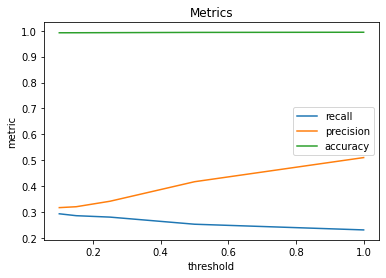

In [22]:
import matplotlib.pyplot as plt

# { threshold: { 'recall': recall , 'precision': precision, 'accuracy': accuracy } }
metrics = dict()
thresholds = [0.1, 0.15, 0.25, 0.5, 1.0]
for threshold in thresholds:
  recall, precision, accuracy = JCfunction(threshold)
  metrics[threshold] = {
    'recall': recall,
    'precision': precision,
    'accuracy': accuracy
  }

plt.figure(1)
plt.title("Metrics")
plt.xlabel("threshold")
plt.ylabel("metric")
recalls = [metrics[threshold]['recall'] for threshold in metrics]
precisions = [metrics[threshold]['precision'] for threshold in metrics]
accuracies = [metrics[threshold]['accuracy'] for threshold in metrics]
plt.plot(thresholds, recalls)
plt.plot(thresholds, precisions)
plt.plot(thresholds, accuracies)
plt.legend(['recall', 'precision', 'accuracy'])




## <B>3. Πρόβλεψη συνδέσμων βάσει similarity-based μετρικών</B></font>    

### 3(i).

* Προτείνετε μια τουλάχιστον μέθοδο, για να εξερευνήσουμε και να εκφράσουμε μέσα από τα πακέτα NumPy ή SciPy ή Pandas την συσχέτιση (correlation) μεταξύ των τιμών των μετρικών <B>Jaccard Coefficient</B>, <B>Preferential Attachment</B>, <B>Resource Allocation</B> για τον μειωμένο γράφο $G'$.
* Σημ.: Δεν χρειάζεται κάποια υλοποίηση, μόνο αναφορά της μεθόδου συσχέτισης και επεξήγηση της επιλογής σας.

### 3(ii).

 Εργαστείτε πάνω σε <B><U>αντίγραφο</U></B> του dataframe που κατασκευάσατε στο ερώτημα 1(vα) (unconnected+removables). Δημιουργήστε στήλη (column) με τις ακμές του γράφου και θέστε την ως index του dataframe. Στο dataframe θα προσθέσετε ως στήλες τις τιμές των μετρικών (<B>Jaccard Coefficient</B>, <B>Preferential Attachment</B>, <B>Resource Allocation</B>) για τον μειωμένο γράφο $G'$. Οι τιμές των μετρικών μπορούν να υπολογιστούν με τις συναρτήσεις του πακέτου NetworkX.
    
    |       | link  |Jacc.Coeff.|Pr.Attachment| Resource Allocation|
    |-------|-------|-----------|-------------|--------------------|
    |(1, 6) |  0    |  0.333333 |     32      |    0.700000        |
    |(1, 46)|  0    |  0.200000 |      8      |    0.166667        |

#### Αντιγράφω το dataframe

In [23]:
import pandas as pd

unconn_remov = merged_df.copy()

#### Προσθέτω τις στήλες

In [24]:
def build_coeffs_from_triplets(triplets, pairs):
  d = {(u, v): val for u,v,val in triplets}
  coeffs = [d.get((u, v)) or 0.0 for (u, v) in pairs]
  return coeffs

def add_column_from_coeffs(coeffs, title, df, col1, col2):
  pairs = [(row[col1], row[col2]) for index,row in list(df.iterrows())]
  cols = list(df.columns)
  df.loc[:, len(cols)+1] = pd.Series(coeffs)
  unconn_remov.columns = cols + [title]
  

In [ ]:
jaccard_dict

In [26]:
#dataframe for similarity-based measurement values
from networkx import preferential_attachment
from networkx import resource_allocation_index

pairs = [(r['u'], r['v']) for index,r in list(unconn_remov.iterrows())]

prefers_triplets = preferential_attachment(graph1)
allocs_triplets = resource_allocation_index(graph1)

jaccard_dict = [jaccard_dict.get((u, v)) or 0.0 for (u, v) in pairs]
prefers_dict = build_coeffs_from_triplets(prefers_triplets, pairs)
allocs_dict = build_coeffs_from_triplets(allocs_triplets, pairs)

metrics = [ 
  {
    'coefficients': jaccard_dict,
    'title': 'jaccard coefficient',
  },
  {
    'coefficients': prefers_dict,
    'title': 'preferential attachment',
  },
  {
    'coefficients': allocs_dict,
    'title': 'resource allocation'
  }
]

for metric in metrics:
  vals, title = metric.values()

  add_column_from_coeffs(
      coeffs=vals,
      title=title,
      df=unconn_remov,
      col1="u",
      col2="v"
  )




<li><B>3(iiiα).</B> Χρησιμοποιήστε τον Random Forest Classifier και το αντίγραφο dataframe που κατασκευάσατε στο ερώτημα 3(ii), για να προβλέψετε συνδέσεις. Συμπληρώστε στον κώδικα: τα features ($X$), την target variable ($y$) και τα ορίσματα της συνάρτησης $fit$ για το training του μοντέλου.</li>  

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
 
X = unconn_remov.iloc[:, [0, 1, 3, 4, 5]].values  #features
Y = unconn_remov[['link']].values #target

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 0)

In [114]:
classifier = RandomForestClassifier()   

from sklearn.preprocessing import MinMaxScaler 
mm_scaler = MinMaxScaler() 
X_train_scaled = mm_scaler.fit_transform(X_train)
X_test_scaled = mm_scaler.transform(X_test)
parameters = {'n_estimators' : [10,50,100], 'max_depth' : [5,10,15]} 
model = GridSearchCV(classifier, param_grid = parameters) 

In [115]:
X_train_scaled

array([[0.23543124, 0.30769231, 0.        , 0.03636364, 0.        ],
       [0.6013986 , 0.68531469, 0.        , 0.00606061, 0.        ],
       [0.01165501, 0.31468531, 0.        , 0.04242424, 0.        ],
       ...,
       [0.03962704, 0.28205128, 0.        , 0.01818182, 0.        ],
       [0.84382284, 0.93939394, 0.        , 0.00606061, 0.        ],
       [0.01398601, 0.27272727, 0.        , 0.00606061, 0.        ]])

In [116]:
model.fit(X_train_scaled, y_train.ravel())

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15],
                         'n_estimators': [10, 50, 100]})

<li><B>3(iiiβ).</B> Δώστε τις ($A.M$ $mod$ $10$) πρώτες προβλέψεις και την ακρίβεια ($accuracy$) του μοντέλου. </li>

In [122]:
predictions = model.predict(X_test_scaled)
# AM=1 -> get oly the first prediciton
predictions[0]

0

In [128]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
print("Accuracy:", accuracy_score(predictions, y_test.ravel()))
print("F1 score:", f1_score(predictions, y_test.ravel()))
print("Recall score:", recall_score(predictions, y_test.ravel()))

Accuracy: 0.9992203742203742
F1 score: 0.7804878048780488
Recall score: 0.9696969696969697


<li><B>3(iiiγ).</B>Υπολογίστε την πιθανότητα να συνδεθούν οι κόμβοι ($1$,$47$) βάσει του μοντέλου σας. </li>

In [119]:
u, v = 1, 47
row = unconn_remov[(unconn_remov["u"]==1) & (unconn_remov["v"]==47)]
X = row.iloc[:, [0,1,3,4,5]]

prob0, prob1 = (model.predict_proba(X))[0]
print(f"No link: {100*prob0}%")
print(f"Link: {100*prob1}%")

No link: 51.0%
Link: 49.0%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


<html><font size=4><B>4. Πρόβλεψη συνδέσμων με embedding βασισμένο σε τυχαίους περιπάτους (Random Walks) </B></font><BR><BR>
    <li><B>4(i).</B> Εξάγετε τα χαρακτηριστικά (features) του γράφου $G'$, που προέκυψε από την αφαίρεση των ακμών. Για τον σκοπό αυτό χρησιμοποιήστε τον αλγόριθμο <B>Node2vec</B> <a href="https://cs.stanford.edu/~jure/pubs/node2vec-kdd16.pdf">[3]</a>. Ο αλγόριθμος αντιστοιχίζει τους κόμβους του γράφου μέσω τυχαίων περιπάτων (biased 2nd order random walks) σε ένα χώρο μικρού αριθμού διαστάσεων (low dimensional space) διατηρώντας την μεταξύ τους γειτνίαση.
        <BR>Για την επιλογή των παραμέτρων: 
            <li>p - παράμετρος τυχαίων περιπάτων p που καθορίζει την πιθανότητα “1/p” επιστροφής στον κόμβο προέλευσης (source node), </li>
                <li>q - παράμετρος τυχαίων περιπάτων q που καθορίζει την πιθανότητα  “1/q” μετακίνησης σε κόμβο μακριά από τον κόμβο προέλευσης (source node), </li>
                 <li>dimensions - πλήθος διαστάσεων των Node2Vec embeddings, </li>
                     <li>num_walks - αριθμός περιπάτων από κάθε κόμβο, </li>
                         <li>walk_length - μήκος τυχαίου περιπάτου, </li>
                             <li>window_size - μέγεθος παραθύρου context για τον αλγόριθμο Word2Vec, </li><li>num_iter - αριθμός SGD επαναλήψεων (epochs), </li>
            <li>workers - αριθμός workers για τον Word2Vec,</li>
            χρησιμοποιήστε τις τιμές:   </html>
   
                   

 |   p   |   q   | dimensions|  num_walks  |walk_length |window_size|        workers            |
 |-------|-------|-----------|-------------|------------|-----------|---------------------------|
 |  1.0  |  1.0  |  128      |     10      |    80      |     10    |multiprocessing.cpu_count()|

In [32]:
#install node2vec with conda / pip
#from node2vec import Node2Vec   #uncomment
#import multiprocessing          #uncomment

#generate walks
#node2vec_walker = Node2Vec(, , , , , , ) #uncomment and complete

#train node2vec model
#n2v_model = node2vec_walker.fit(window= , min_count=1) #uncomment and complete

<html><font>
    <li><B>4(ii).</B> Εφαρμόστε τον αλγόριθμο Random Forest Classifier, για να προβλέψετε τις συνδέσεις.</li><BR>
    <li><B>4(iii).</B> Υπολογίστε την ακρίβεια ($accuracy$) του μοντέλου. </li><BR></font></html>

In [33]:
#apply trained Node2Vec model on each node pair of the dataframe "unconnected+removables"
#uncomment:
#x = [(n2v_model.wv[str(i)]+n2v_model.wv[str(j)]) for i,j in zip(df_with_target_var['node_1'], df_with_target_var['node_2'])]

In [34]:
#X_train, X_test, y_train, y_test = train_test_split(, , random_state = 0)  #uncomment and complete

In [35]:
#uncomment whole cell
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import accuracy_score

#classifier = RandomForestClassifier(max_depth=2, random_state=0) 
#classifier.fit()   #uncomment and complete

<html><font size=4> <B><U>Ερώτηση bonus (+10/100)</U><B>: </font>Για τους binary operators για learning των edge features με τον αλγόριθμο Node2Vec που αναφέρονται στο <a href="https://cs.stanford.edu/~jure/pubs/node2vec-kdd16.pdf">[3]</a> ((α) Average, (β) Hadamard, (γ) Weighted-L1 και (δ) Weighted-L2) τροποποιήστε τoν κώδικά σας και σημειώστε τις παρατηρήσεις σας ως προς την απόδοση του αλγορίθμου.</font></html>

<html><font size=4><B><U>Βιβλιογραφία:</U></B><BR></font>
<a href="https://dl.acm.org/doi/10.1145/2487788.2488173">[1]	Jérôme Kunegis. KONECT – The Koblenz Network Collection. In Proc. Int. Conf. on World Wide Web Companion, pages 1343–1350, 2013.</a><BR>
<a href="https://link.springer.com/chapter/10.1007/978-3-540-76298-0_52">[2]	Sören Auer, Christian Bizer, Georgi Kobilarov, Jens Lehmann, Richard Cyganiak, and Zachary Ives. DBpedia: A nucleus for a web of open data. In Proc. Int. Semant. Web Conf., pages 722–735, 2008.<BR>
<a href="https://cs.stanford.edu/~jure/pubs/node2vec-kdd16.pdf">[3] A. Grover, J. Leskovec, Node2vec: Scalable Feature Learning for Networks. ACM KDD, 2016.</a><BR>
 <a href="https://proceedings.neurips.cc/paper/2013/file/9aa42b31882ec039965f3c4923ce901b-Paper.pdf">[4] T.Mikolov, I.Sutskever, K.Chen, G.S.Corrado and J.Dean, Distributed representations of words and phrases and their compositionality. In NIPS, 2013.</a><BR></font></html>